# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [22]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [23]:
print(df["YEAR"].nunique())

33


33 years

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [24]:
allstates = df.groupby("STATE")["AVG_MATH_4_SCORE"].mean()
mich = allstates["MICHIGAN"]

boo = allstates["OHIO"]

print (mich,"\n",boo)


234.36363636363637 
 239.45454545454547


Ohio had the higher average (somehow)

Find the average for your chosen test across all states in 2019

In [25]:
allyears = df.groupby("YEAR")["AVG_MATH_4_SCORE"].mean()
allyears

YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990    213.000000
1991           NaN
1992    218.418605
1993           NaN
1994           NaN
1995           NaN
1996    224.000000
1997           NaN
1998           NaN
1999           NaN
2000    223.976744
2001           NaN
2002           NaN
2003    234.000000
2004           NaN
2005    237.169811
2006           NaN
2007    239.207547
2008           NaN
2009    239.547170
2010           NaN
2011    240.490566
2012           NaN
2013    241.962264
2014           NaN
2015    240.415094
2016           NaN
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

239.943396 

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [26]:
state = df.groupby("STATE")
state["AVG_MATH_4_SCORE"].max()


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [27]:
df['STATE_REV_PER_STUDENT'] = df['STATE_REVENUE'] /df['GRADES_ALL_G'] 
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G']
df['LOCAL_REV_PER_STUDENT'] = df['LOCAL_REVENUE'] /df['GRADES_ALL_G'] 

Feature engineering justification: I chose to measure average grade 4 math score per state revenue dollar because I wanted to measure whether state revenue will affect grade 4 math scores. I also wanted to measure state's expenditure per student to see whether the amount of money a state spends per student affects their results. I think the local revenue per student will also give insight since local revenue will be more applicable to what is spent on schools.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

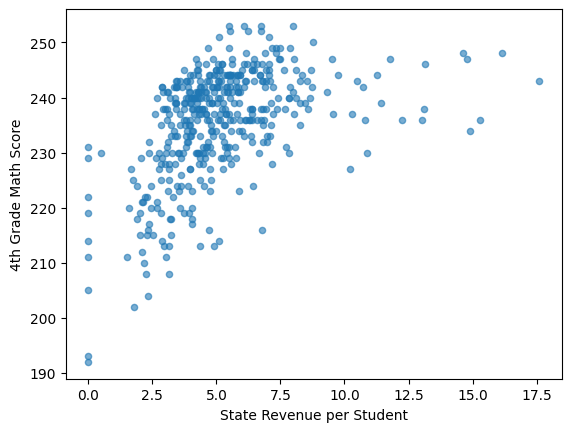

In [28]:
df.plot.scatter(x='STATE_REV_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('State Revenue per Student')
plt.ylabel('4th Grade Math Score')

STATE REV/STUDENT vs 4TH GRADE MATH SCORES: There appears to be a weak/moderate positive correlation between state revenue per student and 4th grade math scores


**Visualization 2**

Text(0, 0.5, 'AVG MATH 4 SCORES')

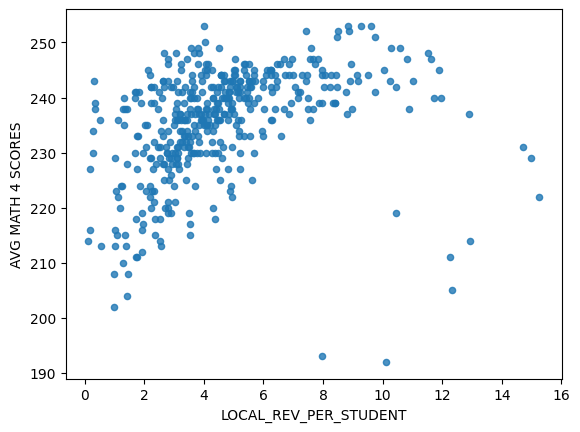

In [29]:
df.plot.scatter(y='AVG_MATH_4_SCORE', x='LOCAL_REV_PER_STUDENT', alpha=0.8)
plt.xlabel('LOCAL_REV_PER_STUDENT')
plt.ylabel('AVG MATH 4 SCORES')

LOCAL REV/STUDENT VS MATH SCORES: There appears to be a weak/moderate positive correlation between local revenue per student and 4th grade math scores. There are some outliers as the local revenue per student gets to higher numbers.


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# X =
# y = 
X = df[['STATE_REV_PER_STUDENT','LOCAL_REV_PER_STUDENT','EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [33]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [34]:
# create your model here
# model = 
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [37]:
# You can see the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

233.02960261146535
[0.49155973 0.2946692  0.07276155]


6.142784515085037

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

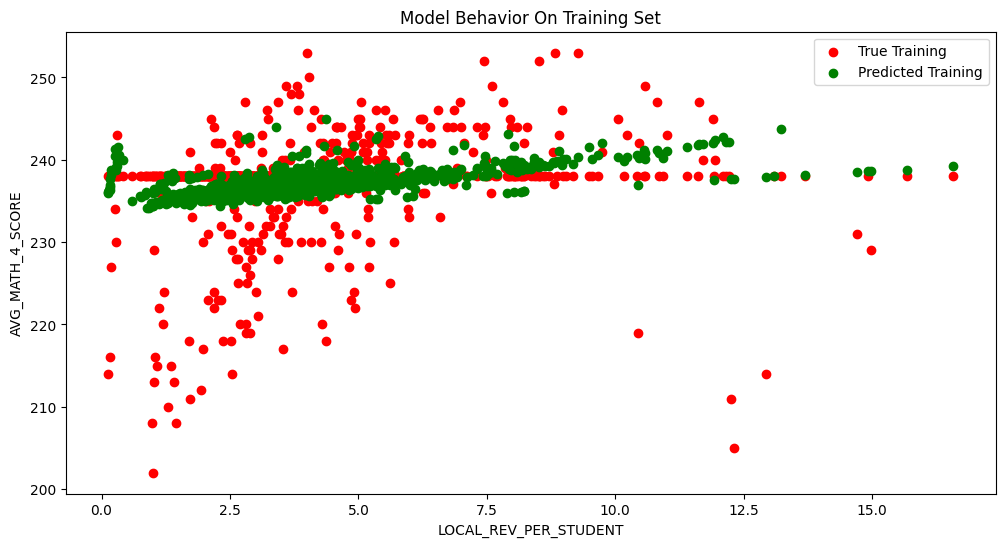

In [38]:
col_name = 'LOCAL_REV_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

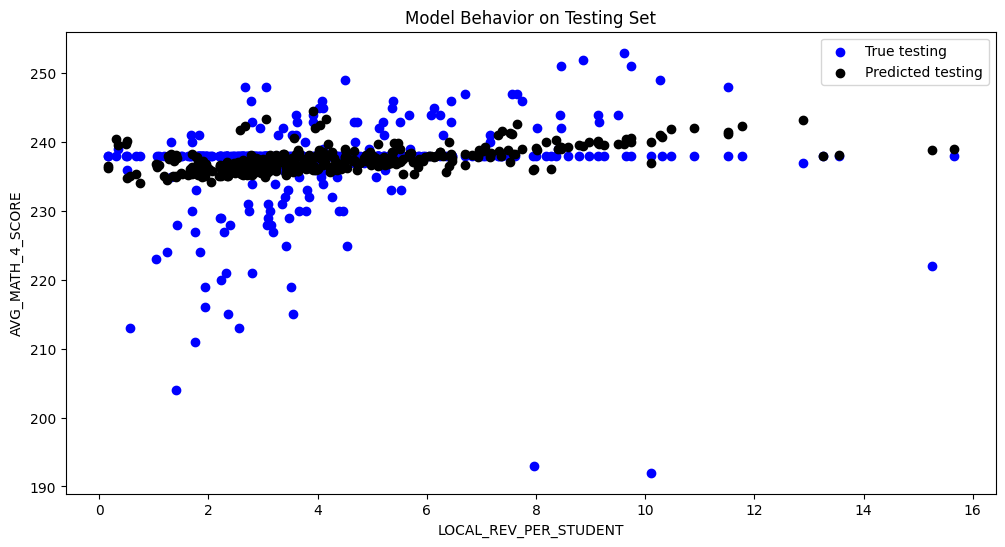

In [39]:
col_name = 'LOCAL_REV_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My model does not capture the true nature of the relationship between local revenue per student and average fourth grade math score. The predicted training shows a positive low slope which does occur in the true training, but the true training has many other dots that stray too. This is the same for the testing model. However, the weak relation does make sense because the more local revenue there is, the more money that can be distributed to the fourth grade math curriculum.